In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('USA_Housing.csv')

## Exploring Data

In [3]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
data.shape

(5000, 7)

In [5]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
# Checking Statistical properties

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,5000.0,6.858311e+04,10657.991214,17796.631190,61480.562388,6.880429e+04,7.578334e+04,1.077017e+05
Avg. Area House Age,5000.0,5.977222e+00,0.991456,2.644304,5.322283,5.970429e+00,6.650808e+00,9.519088e+00
Avg. Area Number of Rooms,5000.0,6.987792e+00,1.005833,3.236194,6.299250,7.002902e+00,7.665871e+00,1.075959e+01
Avg. Area Number of Bedrooms,5000.0,3.981330e+00,1.234137,2.000000,3.140000,4.050000e+00,4.490000e+00,6.500000e+00
Area Population,5000.0,3.616352e+04,9925.650114,172.610686,29403.928702,3.619941e+04,4.286129e+04,6.962171e+04
Price,5000.0,1.232073e+06,353117.626581,15938.657923,997577.135049,1.232669e+06,1.471210e+06,2.469066e+06


C:\Users\Aman Rahees\AppData\Local\Temp\ipykernel_6324\1845466882.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<AxesSubplot: >

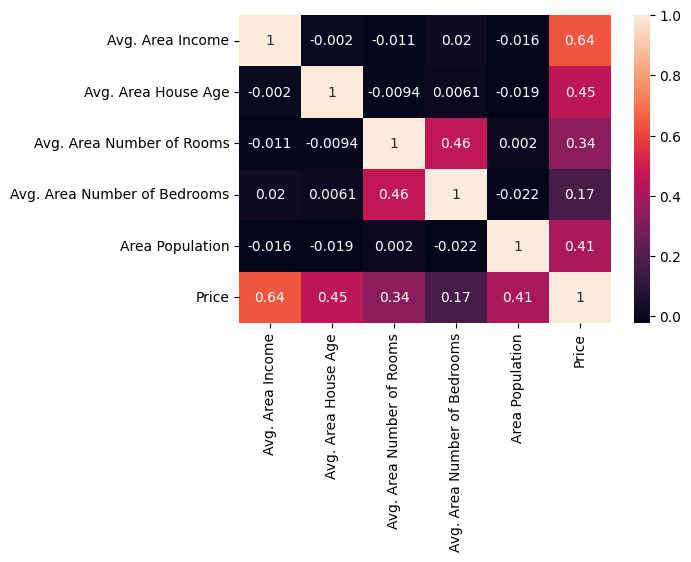

In [8]:
# Checking Correlation
plt.figure(figsize=(6,4))
corr = data.corr()
sns.heatmap(corr, annot=True)

## Data Prepocessing

In [9]:
# Checking For Null Values

data.isnull().values.any()

False

In [10]:
data.drop('Address', axis=1, inplace=True)

### Data splitting

In [11]:
x = data.drop('Price', axis=1)
y = data['Price']

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [25]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

In [26]:
scalar.fit(x_train)

StandardScaler()

In [27]:
x_train_ = scalar.transform(x_train)
x_test_ = scalar.transform(x_test)

# Model Building

## 1.) Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

In [29]:
lr_model.fit(x_train_, y_train)

LinearRegression()

In [30]:
y_pred = lr_model.predict(x_test_)
y_pred

array([ 969608.34680626,  953868.15548654,  907506.32836107, ...,
       1423701.02109721,  744400.93315397,  488525.83117551])

In [31]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

R2 = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

In [32]:
# Evaluating the performance of the Model

print('R2: {:.2f}%'.format(R2*100))
print('MAE: {:.2f}'.format(MAE))
print('MSE: {:.2f}'.format(MSE))
print('RMSE: {:.2f}'.format(RMSE))

R2: 92.01%
MAE: 81563.15
MSE: 10337337828.27
RMSE: 101672.70


## 2.) Support Vector Regression

In [33]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf', C=1000000)

In [34]:
svr_model.fit(x_train_, y_train)

SVR(C=1000000)

In [35]:
y_pred = svr_model.predict(x_test_)
y_pred

array([ 971126.08903083,  939898.59819649,  884854.1464917 , ...,
       1399126.54597205,  747919.03854222,  548257.76111647])

In [36]:
# Checking Performance of SVR Model

print('R2: {:.2f}%'.format(r2_score(y_test, y_pred)*100))
print('MAE: {:.2f}'.format(mean_absolute_error(y_test, y_pred)))
print('MSE: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

R2: 90.20%
MAE: 89599.29
MSE: 12677266790.63
RMSE: 112593.37


## Conclution

Linear Regression model is performing well than Support Vector Regression.